# 1. Supervised Learning

In [57]:
import warnings
warnings.simplefilter('ignore' )

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from __future__ import division
plt.rcParams['figure.figsize'] = (12,6) 

In [58]:
df_global = pd.read_csv('global_metrics.csv')
print(df_global.columns)
df_global = df_global.iloc[:,1:]

Index(['Unnamed: 0', 'poblacion', 'fertilidad', 'VIH', 'CO2', 'IMC_hombres',
       'GDP', 'IMC_mujeres', 'esperanza_vida', 'mortalidad_infantil',
       'region'],
      dtype='object')


## Descripcion de las variables

In [59]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
poblacion              100 non-null float64
fertilidad             100 non-null float64
VIH                    100 non-null float64
CO2                    100 non-null float64
IMC_hombres            100 non-null float64
GDP                    100 non-null float64
IMC_mujeres            100 non-null float64
esperanza_vida         100 non-null float64
mortalidad_infantil    100 non-null float64
region                 100 non-null object
dtypes: float64(9), object(1)
memory usage: 7.9+ KB


In [60]:
df_global.describe().T.iloc[:,1:]

,mean,std,min,25%,50%,75%,max
poblacion,4.023559e+07,1.340227e+08,234457.23,3.219080e+06,8926670.020,2.322755e+07,1.273247e+09
fertilidad,2.714300e+00,1.461026e+00,1.00,1.487500e+00,2.180,3.920000e+00,7.310000e+00
VIH,1.659000e+00,3.389880e+00,0.04,1.000000e-01,0.445,1.310000e+00,2.300000e+01
CO2,3.269000e+00,4.257969e+00,0.01,3.450000e-01,1.595,4.590000e+00,2.366000e+01
IMC_hombres,2.219090e+01,3.613695e+00,15.10,1.900750e+01,22.475,2.491750e+01,2.952000e+01
GDP,1.298642e+04,1.437682e+04,463.87,2.362365e+03,7230.235,1.751293e+04,6.650070e+04
IMC_mujeres,1.159531e+02,1.546900e+01,84.01,1.063575e+02,117.455,1.283375e+02,1.420100e+02
esperanza_vida,6.187010e+01,1.136096e+01,37.67,5.425500e+01,61.840,6.919250e+01,8.801000e+01
mortalidad_infantil,4.281090e+01,4.096852e+01,2.17,8.892500e+00,23.745,7.223250e+01,1.562900e+02


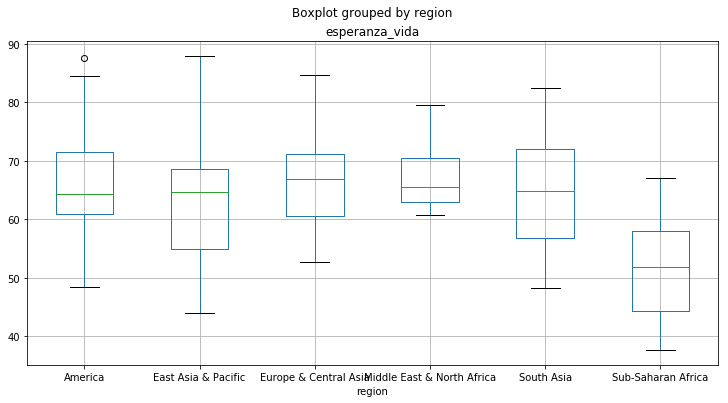

In [61]:
df_global.boxplot('esperanza_vida','region', );

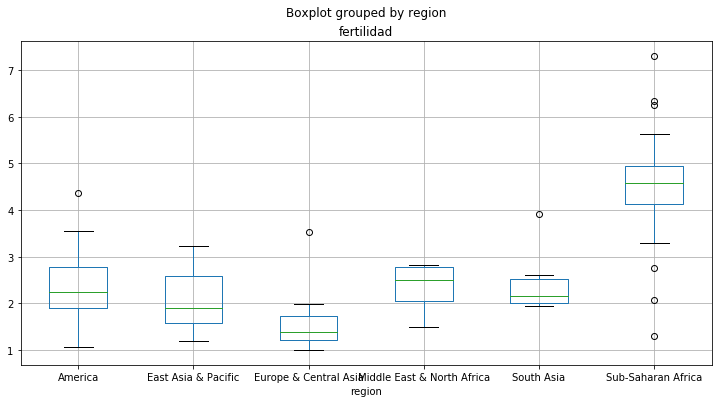

In [62]:
df_global.boxplot('fertilidad','region');

In [63]:
y = df_global['esperanza_vida'].values
X = df_global['fertilidad'].values
X.shape,y.shape

((100,), (100,))

In [64]:
X,y = X.reshape(-1,1), y.reshape(-1,1)
X.shape,y.shape

((100, 1), (100, 1))

Text(0,0.5,'Esperanza de Vida')

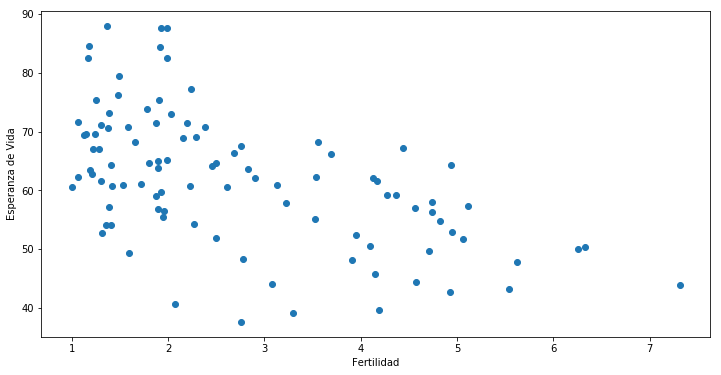

In [65]:
plt.scatter(X,y)
plt.xlabel('Fertilidad')
plt.ylabel('Esperanza de Vida')

The R score: 0.30367885240457204
Slope -4.2851 & Intercept: 73.5012


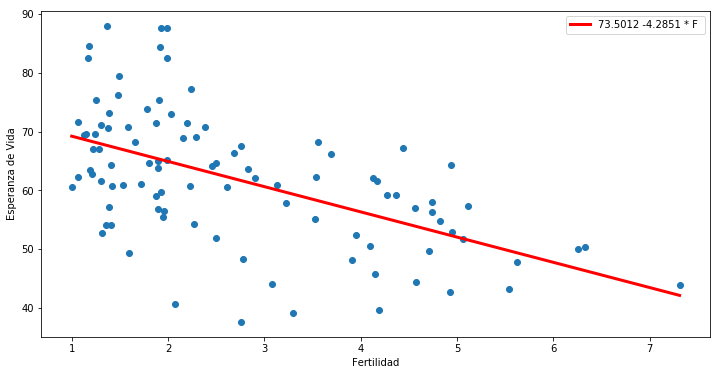

In [66]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()

prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)
# Train with all
reg.fit(X,y)
y_pred = reg.predict(prediction_space)

print('The R score:',reg.score(X, y)) # R^2
print('Slope %.4f & Intercept: %.4f' % (reg.coef_[0][0],reg.intercept_[0]))

plt.scatter(X, y)
plt.plot(prediction_space, y_pred, color='red', linewidth=3)
plt.legend(['%.4f %.4f * F ' % (reg.intercept_[0],reg.coef_[0][0])])
plt.margins(.05)
plt.xlabel('Fertilidad')
plt.ylabel('Esperanza de Vida')
plt.show()

In [67]:
X = df_global.drop(['fertilidad','region'],axis=1)
y = df_global['fertilidad']

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

print("R^2: %.4f" % reg.score(X_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: %.4f" % rmse )

R^2: 0.6236
RMSE: 0.7118


In [68]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(reg,X,y,cv=7)
print(cv_scores)

print("Average 7-Fold CV Score using cross validation: %.4f"%np.mean(cv_scores))

[0.58892122 0.60139874 0.5236406  0.8660213  0.86728489 0.63416002
 0.72316838]
Average 7-Fold CV Score using cross validation: 0.6864


In [69]:
print("Average 10-Fold CV Score using cross validation %.4f" % np.mean(cross_val_score(reg,X,y,cv=10)))

Average 10-Fold CV Score using cross validation 0.4719


In [70]:
X = df_global.drop(['esperanza_vida','region'],axis=1)
y = df_global['esperanza_vida'].values
df_columns = df_global.drop(['esperanza_vida','region'], axis=1).columns

Lasso Regresion with alpha 4:  [-0.         -0.         -0.26842248  0.          0.          0.
 -0.         -0.06018599]
Lasso Regresion with alpha 2:  [-0.00000000e+00 -3.88439184e-01 -7.03494875e-01  0.00000000e+00
  0.00000000e+00  8.82781759e-05 -0.00000000e+00 -6.36624830e-02]


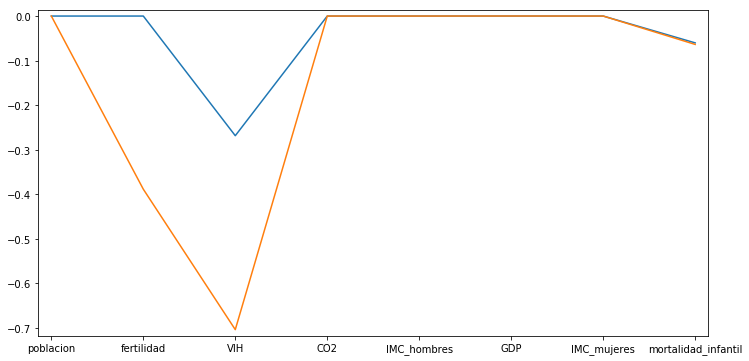

In [71]:
from sklearn.linear_model import Lasso

lasso4 = Lasso(alpha=0.4,normalize=True)
lasso4.fit(X,y)
print("Lasso Regresion with alpha 4: ",lasso4.coef_)

lasso2 = Lasso(alpha=0.2,normalize=True)
lasso2.fit(X,y)
print("Lasso Regresion with alpha 2: ",lasso2.coef_)

x_axis = range(len(X.columns))
# Plot the coefficients
plt.plot(x_axis, lasso4.coef_)
plt.plot(x_axis, lasso2.coef_)
plt.xticks(x_axis, X.columns.values, )
plt.margins(0.02)
plt.show()

In [72]:
def plotRidgeRegressionScores(alpha_space,cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores - std_error, cv_scores + std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_ylim([0,0.5])
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

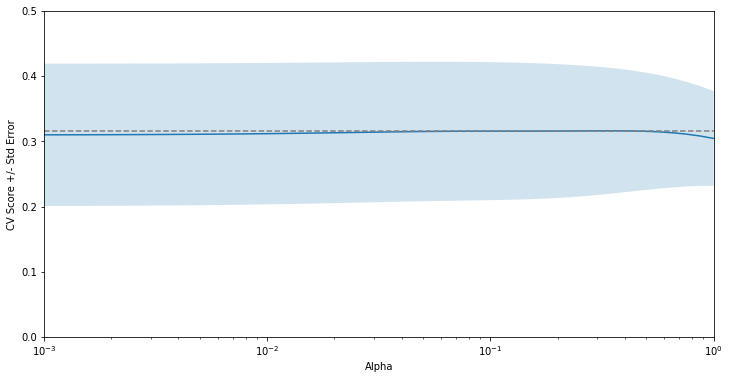

In [73]:
from sklearn.linear_model import Ridge

alpha_space = np.logspace(-3, 0, 50)
ridge_reg_scores = []
ridge_reg_scores_std = []

ridge = Ridge(normalize=True)

for alpha in alpha_space:
    ridge.alpha = alpha
    ridge_reg_cv_scores = cross_val_score(ridge,X,y,cv=5)
    ridge_reg_scores.append(np.mean(ridge_reg_cv_scores))
    ridge_reg_scores_std.append(np.std(ridge_reg_cv_scores))

plotRidgeRegressionScores(alpha_space,ridge_reg_scores, ridge_reg_scores_std)

In [74]:
diabetes = pd.read_csv('diabetes.csv').iloc[:,1:]
X = diabetes.drop(['diabetes'], axis=1)
y = diabetes['diabetes']

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print(knn.score(X_test,y_test))
print(classification_report(y_test, y_pred,target_names=['No has Diabetes','Has Diabetes']))

0.68
                 precision    recall  f1-score   support

No has Diabetes       0.69      0.87      0.77        47
   Has Diabetes       0.62      0.36      0.45        28

    avg / total       0.67      0.68      0.65        75



In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print(knn.score(X_test,y_test))
print(classification_report(y_test, y_pred,target_names=['No has Diabetes','Has Diabetes']))

0.76
                 precision    recall  f1-score   support

No has Diabetes       0.77      0.90      0.83        49
   Has Diabetes       0.72      0.50      0.59        26

    avg / total       0.75      0.76      0.75        75



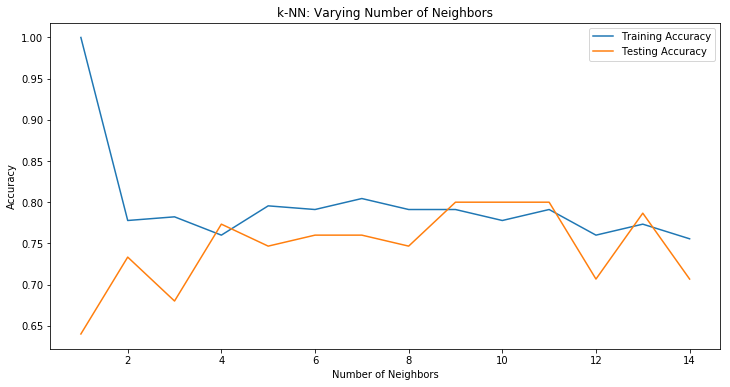

In [76]:
neighbors = np.arange(1, 15)
train = np.empty(len(neighbors))
test = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train[i] = knn.score(X_train, y_train)
    test[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, train, label = 'Training Accuracy')
plt.plot(neighbors, test, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### Best Neighbors k is 5

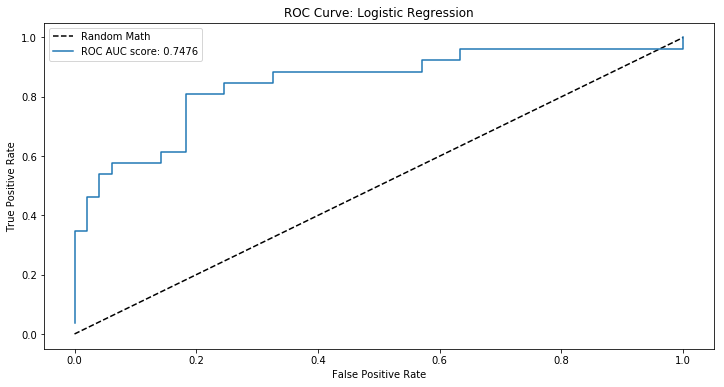

In [77]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr,tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Random Math','ROC AUC score: %.4f'%roc_auc_score(y_test,y_pred)])
plt.title('ROC Curve: Logistic Regression')
plt.show()

In [78]:
cv_auc = cross_val_score(logreg,X,y,cv=10,scoring='roc_auc')

print("MEAN of AUC for 10-fold: %.4f" % np.mean(cv_auc))

MEAN of AUC for 10-fold: 0.8057


In [79]:
from sklearn.model_selection import GridSearchCV
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space,'penalty':['l1','l2']}

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train,y_train)
y_pred = logreg_cv.predict(X_test)
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]
r2 = logreg_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print("Logistic Regression best Parameters: %s"%logreg_cv.best_params_)
print("Best score %.4f" % logreg_cv.best_score_)
print("Logistic Regression R squared: {}".format(r2))
print("Logistic Regression MSE: {}".format(mse))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

Logistic Regression best Parameters: {'C': 3.727593720314938, 'penalty': 'l2'}
Best score 0.7422
Logistic Regression R squared: 0.8
Logistic Regression MSE: 0.2
AUC: 0.8563579277864992


In [80]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"max_depth": [3,5,7, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X_train,y_train)
y_pred = tree_cv.predict(X_test)
y_pred_prob = tree_cv.predict_proba(X_test)[:,1]
r2 = tree_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print("Decision Tree best parameters: %s"%tree_cv.best_params_)
print("Best score %.4f"%tree_cv.best_score_)
print("DecisionTreeClassifier R squared: {}".format(r2))
print("DecisionTreeClassifier MSE: {}".format(mse))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

Decision Tree best parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7}
Best score 0.7333
DecisionTreeClassifier R squared: 0.72
DecisionTreeClassifier MSE: 0.28
AUC: 0.8021978021978022


In [81]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
l1_space = np.linspace(-1, 1, 30)
param_grid = {'l1_ratio': l1_space}

elastic_net = ElasticNet()
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)
gm_cv.fit(X_train,y_train)

y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print("Tuned ElasticNet best params: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet best params: {'l1_ratio': -0.10344827586206895}
Tuned ElasticNet R squared: 0.3336526217926933
Tuned ElasticNet MSE: 0.15092027730419708


In [82]:
df_global_dummy = pd.get_dummies(df_global,drop_first=True) # bye bye region_America
df_global_dummy.columns

Index(['poblacion', 'fertilidad', 'VIH', 'CO2', 'IMC_hombres', 'GDP',
       'IMC_mujeres', 'esperanza_vida', 'mortalidad_infantil',
       'region_East Asia & Pacific', 'region_Europe & Central Asia',
       'region_Middle East & North Africa', 'region_South Asia',
       'region_Sub-Saharan Africa'],
      dtype='object')

In [83]:
# if region_America is selected:
df_global_dummy.iloc[2:3,-5:] # dummy variables has zero

,region_East Asia & Pacific,region_Europe & Central Asia,region_Middle East & North Africa,region_South Asia,region_Sub-Saharan Africa
2,0,0,0,0,0


In [84]:
X = df_global_dummy.drop('fertilidad',axis=1)
y = df_global_dummy[['fertilidad']]
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.5,normalize=True)
ridge_cv = cross_val_score(ridge,X,y,cv=5)
print(ridge_cv)
print(np.mean(ridge_cv))

[0.61589574 0.83313581 0.83750226 0.78407656 0.73092812]
0.7603076976619751


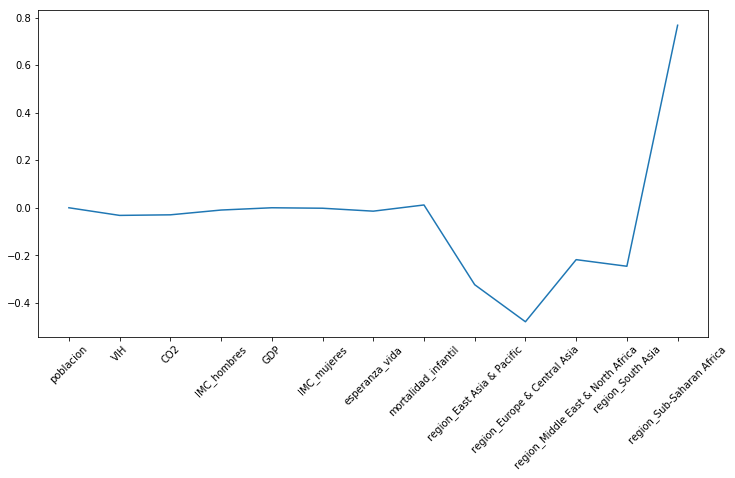

In [85]:
ridge.fit(X,y)
plt.plot(range(len(ridge.coef_[0])),ridge.coef_[0])
plt.xticks(range(len(ridge.coef_[0])),X.columns,rotation=45);

In [86]:
X = diabetes.drop(['diabetes'], axis=1)
y = diabetes['diabetes']

In [87]:
for i in range(30):
    idx = np.random.choice(np.arange(len(X)),1)
    idy = np.random.choice(np.arange(len(X.columns[:-1])),1)
    X.iloc[idx,idy] = np.nan
    
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
pregnancies    296 non-null float64
glucose        295 non-null float64
diastolic      295 non-null float64
triceps        292 non-null float64
insulin        296 non-null float64
bmi            296 non-null float64
dpf            300 non-null float64
age            300 non-null int64
dtypes: float64(7), int64(1)
memory usage: 18.8 KB


In [88]:
X.isnull().sum()

pregnancies    4
glucose        5
diastolic      5
triceps        8
insulin        4
bmi            4
dpf            0
age            0
dtype: int64

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [90]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

X_clean = pd.DataFrame(imp.fit_transform(X),columns=X.columns)

In [91]:
X_clean.isnull().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
dtype: int64

In [92]:
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
svm = SVC(probability=True)

steps = [('imputer', imp), ('SVM', svm)]
pipeline = Pipeline(steps)
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
y_pred_prob_svm = pipeline.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC: %.4f"%roc_auc_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.66      1.00      0.79        59
          1       0.00      0.00      0.00        31

avg / total       0.43      0.66      0.52        90

ROC AUC: 0.5000


In [93]:
steps = [('imputer', imp), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
y_pred_prob_knn = pipeline.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC: %.4f"%roc_auc_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.83      0.83      0.83        59
          1       0.68      0.68      0.68        31

avg / total       0.78      0.78      0.78        90

ROC AUC: 0.7540


In [94]:
steps = [('imputer', imp), ('knn', LogisticRegression())]
pipeline = Pipeline(steps)
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
y_pred_prob_lgr = pipeline.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC: %.4f"%roc_auc_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.78      0.86      0.82        59
          1       0.68      0.55      0.61        31

avg / total       0.75      0.76      0.75        90

ROC AUC: 0.7064


In [95]:
steps = [('imputer', imp), ('knn', DecisionTreeClassifier(max_depth=5))]
pipeline = Pipeline(steps)
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
y_pred_prob_dtc = pipeline.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC: %.4f"%roc_auc_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.76      0.66      0.71        59
          1       0.49      0.61      0.54        31

avg / total       0.67      0.64      0.65        90

ROC AUC: 0.6370


In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('imputer',imp),
                     ('scaler', StandardScaler()), 
                     ('knn', KNeighborsClassifier(n_neighbors=5))])
knn_standar_scale = pipeline.fit(X_train,y_train)
y_pred = knn_standar_scale.predict(X_test)
y_pred_prob_knn_ss = knn_standar_scale.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print('KNN with 5 neighbors, Test Accuracy: %.4f'%knn_standar_scale.score(X_test,y_test))

             precision    recall  f1-score   support

          0       0.78      0.83      0.80        59
          1       0.63      0.55      0.59        31

avg / total       0.73      0.73      0.73        90

KNN with 5 neighbors, Test Accuracy: 0.7333


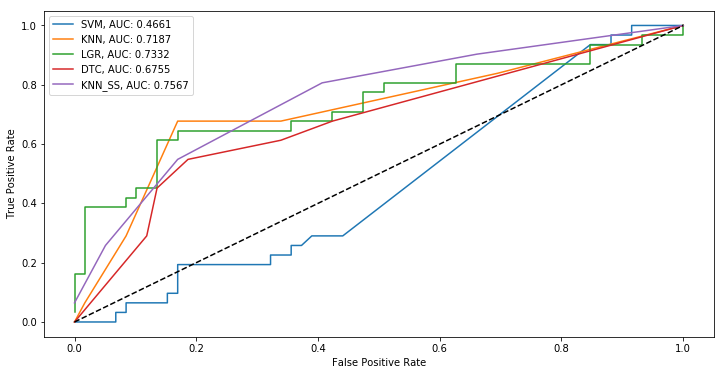

In [97]:
from sklearn.metrics import auc
for label,y_pred_prob in zip(["SVM","KNN","LGR","DTC","KNN_SS"],
                    [y_pred_prob_svm,y_pred_prob_knn,y_pred_prob_lgr,y_pred_prob_dtc,y_pred_prob_knn_ss]):
    fpr,tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr,label=label+str(", AUC: %.4f"%auc(fpr,tpr)))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [98]:
pipeline = Pipeline([('imputer',imp),
                     ('scaler', StandardScaler()), 
                     ('knn', KNeighborsClassifier())])
parameters = {'knn__n_neighbors':[3,4,5,6,7]}

cv = GridSearchCV(pipeline,param_grid=parameters)
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)

print(classification_report(y_test, y_pred))
print("Best Parameters: %s"%cv.best_params_)
print("Best Accuracy: %.4f"%cv.best_score_)
print("Test Accuracy: %.4f"%cv.score(X_test, y_test))

             precision    recall  f1-score   support

          0       0.78      0.88      0.83        59
          1       0.70      0.52      0.59        31

avg / total       0.75      0.76      0.75        90

Best Parameters: {'knn__n_neighbors': 7}
Best Accuracy: 0.7333
Test Accuracy: 0.7556


In [99]:
pipeline = Pipeline([('imputer',imp),
                     ('scaler', StandardScaler()), 
                     ('SVM', SVC())])
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1,0.01, 0.001]}

cv = GridSearchCV(pipeline,param_grid=parameters)
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)

print(classification_report(y_test, y_pred))
print("Best Parameters: %s"%cv.best_params_)
print("Best Accuracy: %.4f"%cv.best_score_)
print("Test Accuracy: %.4f"%cv.score(X_test, y_test))

             precision    recall  f1-score   support

          0       0.79      0.92      0.85        59
          1       0.77      0.55      0.64        31

avg / total       0.79      0.79      0.78        90

Best Parameters: {'SVM__C': 10, 'SVM__gamma': 0.01}
Best Accuracy: 0.7524
Test Accuracy: 0.7889


In [100]:
pipeline = Pipeline([('imputer',imp),
                     ('scaler', StandardScaler()), 
                     ('lgr', LogisticRegression())])
parameters = {'lgr__C':[1, 10, 100],
              'lgr__penalty':['l1', 'l2']}

cv = GridSearchCV(pipeline,param_grid=parameters)
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)

print(classification_report(y_test, y_pred))
print("Best Parameters: %s"%cv.best_params_)
print("Best Accuracy: %.4f"%cv.best_score_)
print("Test Accuracy: %.4f"%cv.score(X_test, y_test))

             precision    recall  f1-score   support

          0       0.81      0.88      0.85        59
          1       0.73      0.61      0.67        31

avg / total       0.78      0.79      0.78        90

Best Parameters: {'lgr__C': 1, 'lgr__penalty': 'l2'}
Best Accuracy: 0.7571
Test Accuracy: 0.7889


In [101]:
pipeline = Pipeline([('imputer',imp),
                     ('scaler', StandardScaler()), 
                     ('tree', DecisionTreeClassifier())])
parameters = {"tree__max_depth": [3,5,7, None],
              "tree__max_features": randint(1, 9),
              "tree__min_samples_leaf": randint(1, 9),
              "tree__criterion": ["gini", "entropy"]}

cv = RandomizedSearchCV(pipeline,parameters)
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)

print(classification_report(y_test, y_pred))
print("Best Parameters: %s"%cv.best_params_)
print("Best Accuracy: %.4f"%cv.best_score_)
print("Test Accuracy: %.4f"%cv.score(X_test, y_test))

             precision    recall  f1-score   support

          0       0.73      0.69      0.71        59
          1       0.47      0.52      0.49        31

avg / total       0.64      0.63      0.64        90

Best Parameters: {'tree__criterion': 'gini', 'tree__max_depth': None, 'tree__max_features': 2, 'tree__min_samples_leaf': 3}
Best Accuracy: 0.7095
Test Accuracy: 0.6333


In [102]:
X = df_global_dummy.drop(['esperanza_vida'], axis=1)
y = df_global_dummy['esperanza_vida']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [104]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('elasticnet', ElasticNet())])

parameters = {"elasticnet__l1_ratio": np.linspace(0.1,0.9,9),
              "elasticnet__normalize": [True,False],
              "elasticnet__selection": ['cyclic','random']}

cv = GridSearchCV(pipeline,parameters)
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)

print("Best Parameters: %s"%cv.best_params_)
print("Best R^2: %.4f"%cv.best_score_)
print("Test R^2: %.4f"%cv.score(X_test, y_test))

Best Parameters: {'elasticnet__l1_ratio': 0.9, 'elasticnet__normalize': False, 'elasticnet__selection': 'cyclic'}
Best R^2: 0.1809
Test R^2: 0.3212


In [105]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('lasso', Lasso())])

parameters = {"lasso__alpha": np.linspace(-0.5,0.5,20),
              "lasso__normalize": [True,False],
              "lasso__selection": ['cyclic','random']}

cv = GridSearchCV(pipeline,parameters)
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)

print("Best Parameters: %s"%cv.best_params_)
print("Best R^2: %.4f"%cv.best_score_)
print("Test R^2: %.4f"%cv.score(X_test, y_test))

Best Parameters: {'lasso__alpha': 0.39473684210526305, 'lasso__normalize': True, 'lasso__selection': 'random'}
Best R^2: 0.2986
Test R^2: 0.2227


In [106]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('ridge', Ridge())])

parameters = {"ridge__alpha": np.linspace(-1,1,20),
              "ridge__normalize": [True,False]}

cv = GridSearchCV(pipeline,parameters)
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)

print("Best Parameters: %s"%cv.best_params_)
print("Best R^2: {}".format(cv.best_score_))
print("Test R^2: %.4f"%cv.score(X_test, y_test))

Best Parameters: {'ridge__alpha': 1.0, 'ridge__normalize': True}
Best R^2: 0.14446510294224701
Test R^2: 0.3268
